In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
import collections, numpy
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC

In [5]:
def load_data(path,target):
    df = pd.read_csv(path)
    y = df[target]
    X = df.drop(labels = target, axis = 1)
    X = X.apply(pd.to_numeric)
    #train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.10, random_state=42)
    #return train_X, test_X, train_y, test_y
    return df,X,y
    
def load_mutated_data(path,target):
    df = pd.read_csv(path)
    y = df[target]
    X = df.drop(labels = target, axis = 1)
    X = X.apply(pd.to_numeric)
    return df,X,y

#Get Train Dataset
def get_train(i):
    file = 'Data/NSL-KDD/modified/Train/Normal_Data/N' + str(i) + '.csv'
    train_df, train_X, train_y = load_data(file,'defects')
    y_train = []
    for instance in train_y.values:
        if instance == 'normal':
            y_train.append(1)
        else:
            y_train.append(-1)
    train_df.defects.unique()
    return train_df,train_X,y_train

#Get Test Dataset
def get_test(i):
    file = 'Data/NSL-KDD/modified/Train/5_anomaly/A' + str(i) + '.csv'
    train_df, train_X, train_y = load_data(file,'defects')
    y_train = []
    for instance in train_y.values:
        if instance == 'normal':
            y_train.append(1)
        else:
            y_train.append(-1)
    train_df.defects.unique()
    return train_df,train_X,y_train

In [6]:
#Get Dataset
file = 'Data/NSL-KDD/modified/Train/train.csv'
train_df, train_X, train_y = load_data(file,'defects')
y_train = []
for instance in train_y.values:
    if instance == 'normal':
        y_train.append(1)
    else:
        y_train.append(-1)

In [10]:
file = 'Data/NSL-KDD/modified/Test/test.csv'
test_df, test_X,test_y = load_mutated_data(file,'defects')
y_test = []
for instance in test_y.values:
    if instance == 'normal':
        y_test.append(1)
    else:
        y_test.append(-1)

In [7]:
# One Class SVM
clf =  OneClassSVM(kernel = 'sigmoid',gamma = 'scale',nu=0.4,shrinking= False)
clf.fit(train_X)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale',
      kernel='sigmoid', max_iter=-1, nu=0.4, random_state=None,
      shrinking=False, tol=0.001, verbose=False)

In [13]:
# Another Set
df_combined = pd.DataFrame([])
perf_score = []
first = True
for i in range(10):
    print("Iteration :", i)
    Ai, Ai_X, Ai_y = get_train(i)
    Aj, Aj_X, Aj_y = get_test(i)
    predicted = clf.predict(Ai_X)
    precision = metrics.precision_score(Ai_y,predicted,average='weighted')
    recall = metrics.recall_score(Ai_y,predicted,average='weighted')
    f1_Score = metrics.f1_score(Ai_y,predicted,average='weighted')
    x = metrics.classification_report(Ai_y, predicted,output_dict=True)
    perf_score.append([precision,recall,f1_Score,x])
    predicted = clf.predict(Aj_X)
    precision = metrics.precision_score(Aj_y,predicted,average='weighted')
    recall = metrics.recall_score(Aj_y,predicted,average='weighted')
    f1_Score = metrics.f1_score(Aj_y,predicted,average='weighted')
    x = metrics.classification_report(Aj_y, predicted,output_dict=True)
    perf_score.append([precision,recall,f1_Score,x])

Iteration : 0


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Iteration : 1


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Iteration : 2


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Iteration : 3


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Iteration : 4


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Iteration : 5


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Iteration : 6


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Iteration : 7


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Iteration : 8


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Iteration : 9


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [11]:
predicted = clf.predict(test_X)
a = collections.Counter(predicted)
print(a)
print(metrics.classification_report(y_test, predicted))

Counter({1: 12173, -1: 7427})
              precision    recall  f1-score   support

          -1       0.48      0.44      0.46      8070
           1       0.63      0.66      0.64     11530

   micro avg       0.57      0.57      0.57     19600
   macro avg       0.55      0.55      0.55     19600
weighted avg       0.57      0.57      0.57     19600



In [ ]:
# Isolation Forest
clf_isolation =  IsolationForest(n_estimators = 100, contamination = 0.4, bootstrap = False, behaviour = 'new')
clf_isolation.fit(train_X)

In [ ]:
predicted = clf_isolation.predict(test_X)
a = collections.Counter(predicted)
print(a)
print(metrics.classification_report(y_test, predicted))

In [ ]:
# DBScan
clf = DBSCAN(eps=10, min_samples=30)
clf.fit(train_X)

In [ ]:
predicted = clf.labels_
a = collections.Counter(predicted)
print(a)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('PCA of Data', fontsize = 20)
targets = train_df.defects.unique()
colors = ['g', 'r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r']
for target, color in zip(targets,colors):
    indicesToKeep = train_df['defects'] == target
    ax.scatter(train_df.loc[indicesToKeep, '0']
               , train_df.loc[indicesToKeep, '1']
               , train_df.loc[indicesToKeep, '2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [16]:
perf_score_df = pd.DataFrame(perf_score, columns = ['Precision',
                                                   'Recall',
                                                   'F1-Score','report'])

In [17]:
class_1 = []
class_2 = []
for i in range(perf_score_df.shape[0]):
    class_1.append(perf_score_df.iloc[i,3]['1']['f1-score'])
    class_2.append(perf_score_df.iloc[i,3]['-1']['f1-score'])

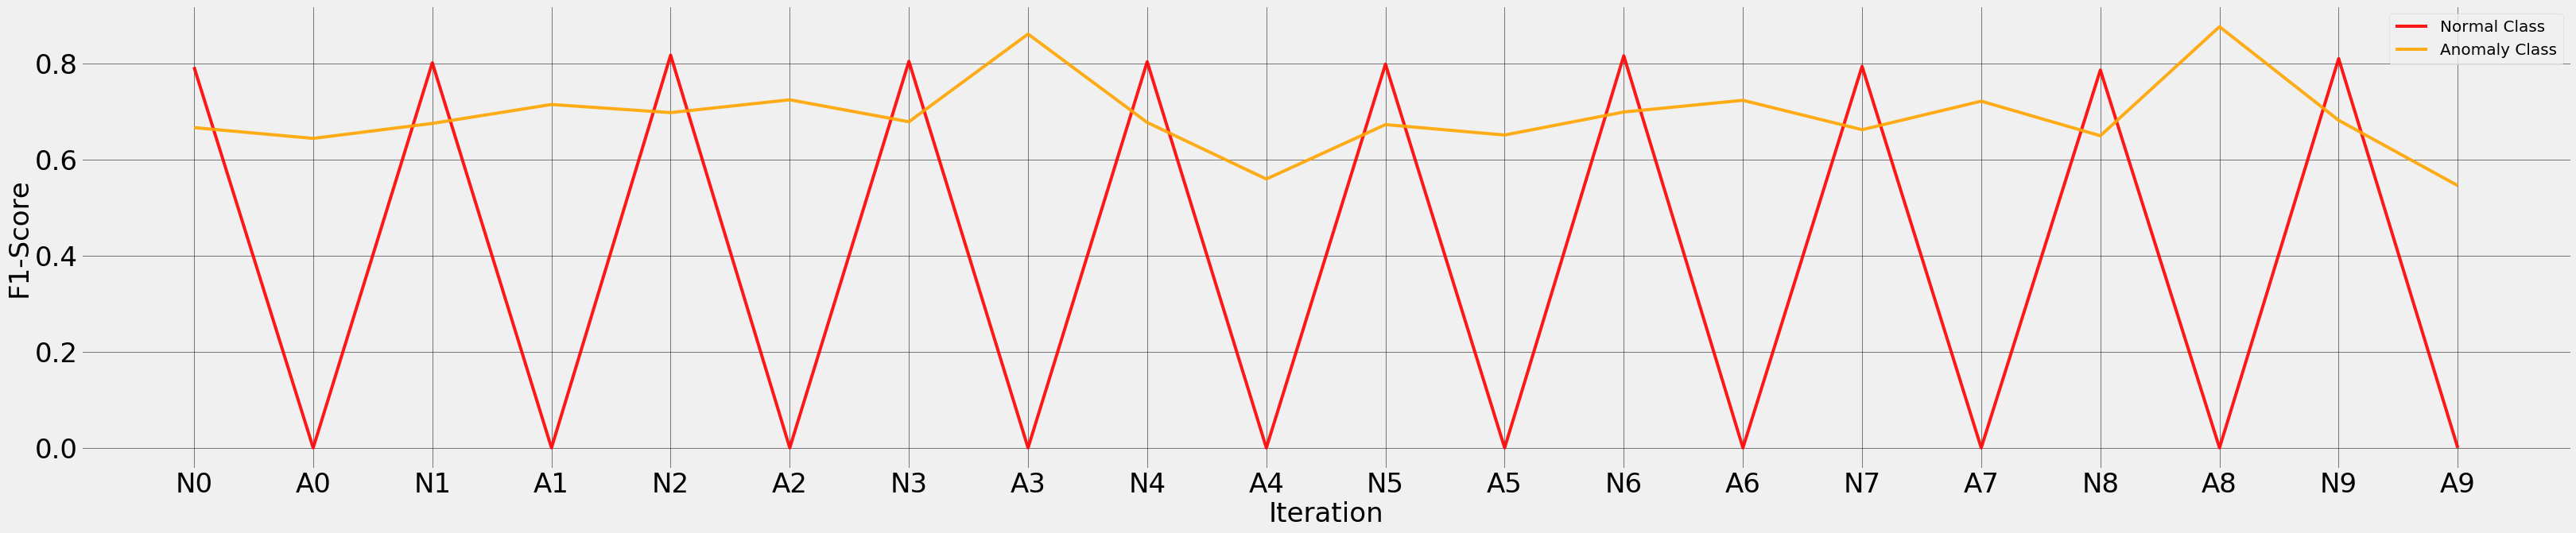

In [20]:
import matplotlib.pyplot as plt
import numpy as np
ticks = ['N0','A0','N1','A1','N2','A2','N3','A3','N4','A4','N5','A5','N6','A6','N7','A7','N8','A8','N9','A9']
# style
plt.style.use('fivethirtyeight')
 
# create a color palette
fig = plt.figure(num=None, figsize = (50,10))
score = perf_score_df['F1-Score'].values
ax = fig.add_subplot(1,1,1)
ax.plot(class_1,marker='', color='red', linewidth=4, alpha=0.9, label='Trained On Classes')
ax.plot(class_2,marker='', color='orange', linewidth=4, alpha=0.9, label='Trained On Classes')
ax.legend(['Normal Class','Anomaly Class'],fontsize=20)
plt.xlabel('Iteration', fontsize=34)
plt.ylabel('F1-Score', fontsize=34)
#ax.set(xlabel='Iteration', ylabel='F1-Score',fontsize = 34)
ax.tick_params(direction='out', labelsize=34,
               grid_color='black', grid_alpha=0.5)
ax.set_xticks(np.arange(20))
ax.set_xticklabels(ticks)
plt.show()